This is a dataset consisting of several features of stars.

Some of them are:

    Absolute Temperature (in K)
    Relative Luminosity (L/Lo)
    Relative Radius (R/Ro)
    Absolute Magnitude (Mv)
    Star Color (white,Red,Blue,Yellow,yellow-orange etc)
    Spectral Class (O,B,A,F,G,K,,M)
    Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

1. Brown Dwarf -> Star Type = 0
2. Red Dwarf -> Star Type = 1
3. White Dwarf-> Star Type = 2
4. Main Sequence -> Star Type = 3
5. Supergiant -> Star Type = 4
6. Hypergiant -> Star Type = 5


In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
df.shape #checking  shape of the data

(240, 7)

In [4]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.isna().sum()/len(df) #percentange of missing values in each column

Temperature (K)           0.0
Luminosity(L/Lo)          0.0
Radius(R/Ro)              0.0
Absolute magnitude(Mv)    0.0
Star type                 0.0
Star color                0.0
Spectral Class            0.0
dtype: float64

Below diagram is the 

Below images, show that the stars follows a certain graph in the celestial Space ,
called Hertzsprung-Russell Diagram or simply HR-Diagram

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3791628%2Ffe9436bf4e2d23b5b18fb3db1f1fcbcb%2FHRDiagram.png?generation=1597348809674507&alt=media)
![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3791628%2F9fc57334a9b9fafbc71aacdd6e5cd69c%2F310px-Hertzsprung-Russel_StarData.png?generation=1597349661801284&alt=media)
![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3791628%2F14338bbebf77d18e1faef582bccdbdd6%2Fhr.jpg?generation=1597349509841965&alt=media)

Let's visualize HR-diagram with our data

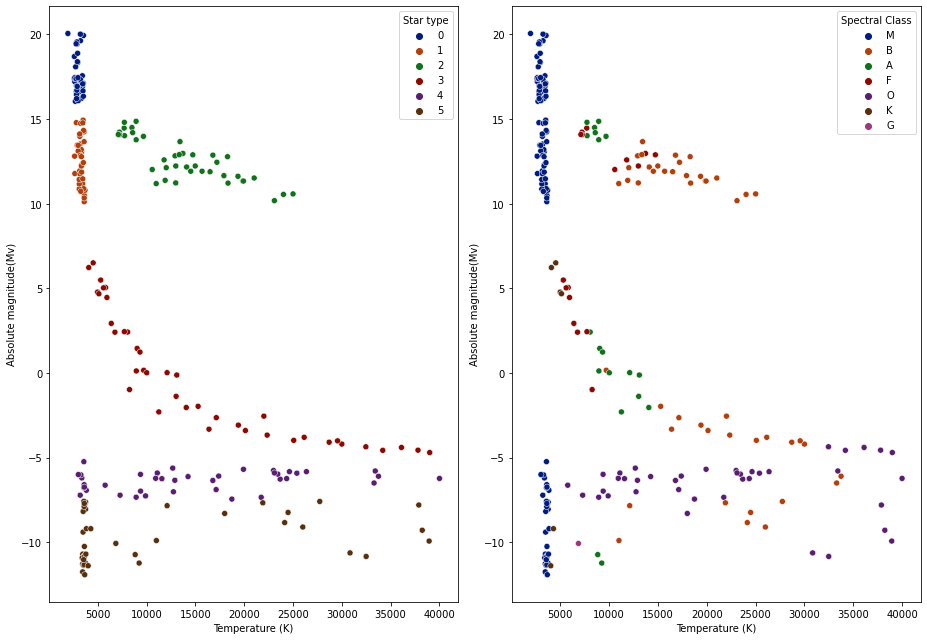

In [6]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=df,hue='Star type',ax=ax[0],palette='dark')
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=df,hue='Spectral Class',ax=ax[1],palette='dark')
plt.tight_layout()
plt.show()

The above diagram resembles a graph similar to HR-diagram

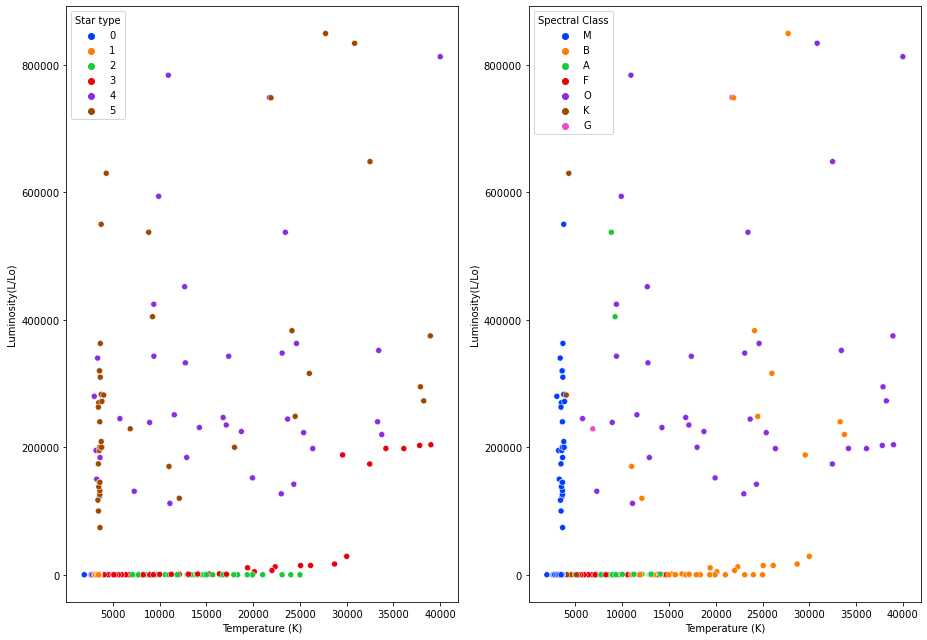

In [7]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=df,hue='Star type',ax=ax[0],palette='bright')
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=df,hue='Spectral Class',ax=ax[1],palette='bright')
plt.tight_layout()
plt.show()

In [8]:
#splitting dataframe into categorical and numeric features to perform preprocessing
df_cat=df.select_dtypes(exclude=np.number)
df_num=df.select_dtypes(include=np.number)

In [9]:
df_cat.head(2)

,Star color,Spectral Class
0,Red,M
1,Red,M


In [10]:
df_num.head(2)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.0024,0.1700,16.12,0
1,3042,0.0005,0.1542,16.60,0


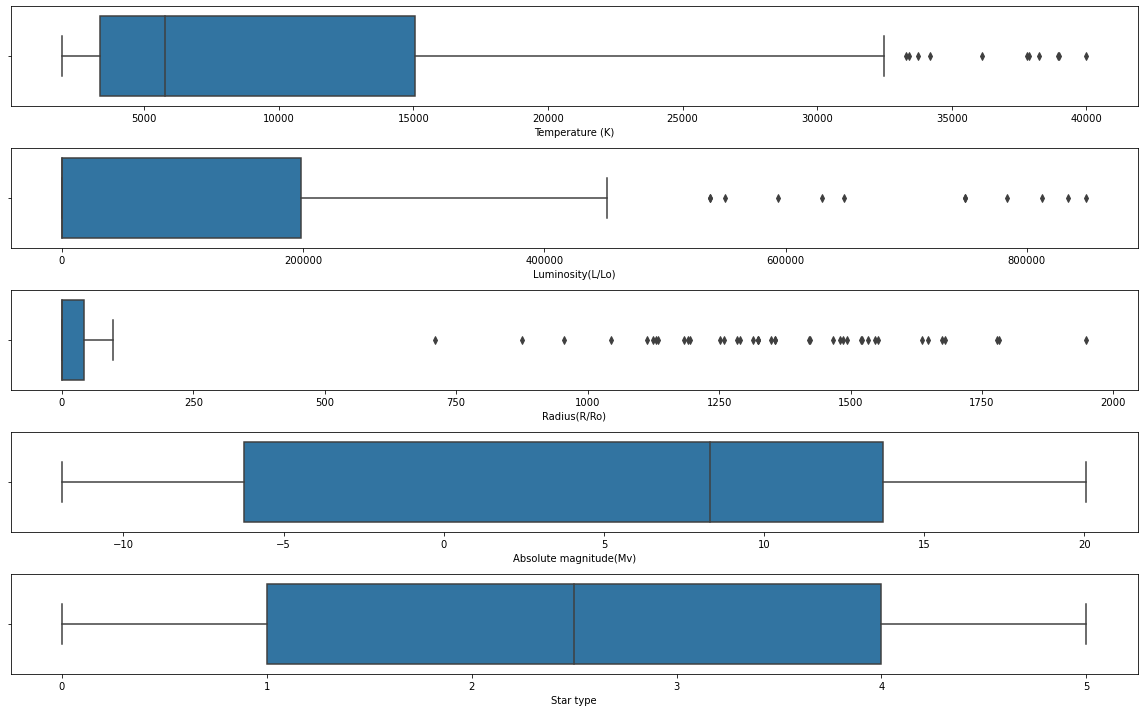

In [11]:
#visualizing outliers
fig,ax=plt.subplots(len(df_num.columns),figsize=(16,10))
for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.iloc[:,i],ax=ax[i],hue=df_num['Star type'])
    plt.tight_layout()
plt.show()

Since these outliers are natural variations,it is not necessary to remove them.

In [12]:
#ckeckin for class imbalance
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

we have an equally classified dataset

In [13]:
#numeric features description
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


From the above table, we can see that the values among features vary drastically,hence scaling is required.

In [14]:
#initializing standardscaler for scaling
ss=StandardScaler()

In [15]:
scaled_num=pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)
scaled_num.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


In [16]:
#encoding categorical variables
encoded_cat=pd.get_dummies(df_cat,drop_first=True)
encoded_cat.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#combining scaled numeric variables and encoded categorical variables
df_mod=pd.concat([encoded_cat,scaled_num],axis=1)
df_mod.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


In [18]:
X=df_mod.drop('Star type',axis=1)
y=df['Star type']

In [19]:
#splitting training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=6)

In [20]:
# trying knn classifier with 3 neighbors
kn3=KNeighborsClassifier(n_neighbors=3)

In [21]:
kn3_model=kn3.fit(X_train,y_train)

In [22]:
train_score=kn3_model.score(X_train,y_train)
print('Train_score:',train_score)
test_score=kn3_model.score(X_test,y_test)
print('Test_score:',test_score)

Train_score: 0.984375
Test_score: 0.9791666666666666


scores of the training and test data are very close to each other,which implies that the model also performs well for unseen data.

## Lets check with classification metrics

In [23]:
train_pred=kn3_model.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        30
           3       0.91      1.00      0.96        32
           4       1.00      0.94      0.97        36
           5       1.00      0.97      0.98        33

    accuracy                           0.98       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.98      0.98       192



The 'f1-weighted avg' score is 0.98 which implies that our model is able to classify 98% of the data correctly.

## Cross Validating the model

In [24]:
k = KFold(n_splits=5,shuffle=True,random_state=48)#splitting into five folds
scores = cross_val_score(kn3,X_train,y_train,cv=k,scoring='f1_weighted')

In [25]:
scores

array([0.97616893, 0.94871795, 1.        , 1.        , 0.97451963])

In [26]:
print('Bias error:', 1 -  np.mean(scores))
print('Variance error:',np.std(scores)/np.mean(scores))

Bias error: 0.02011869795151533
Variance error: 0.019487656442323933


very low bias and variance error,therefore there is no overfitting or underfitting in the model

## GridSearchCV

Let's find the best value of n_neighbors using GRIDSEARCHCV

In [27]:
params={'n_neighbors':range(2,8)}#assigning n_neighbors from 2 to 7

In [28]:
knn=KNeighborsClassifier()#initializing function
grd=GridSearchCV(knn,param_grid=params,cv=5,scoring='f1_weighted')

In [29]:
#fiiting the grid model to training set
grid_model=grd.fit(X_train,y_train)

In [30]:
#finding best score and n_neigbors
print('Best n_neighbors:',grid_model.best_params_)
print('Best Score:',grid_model.best_score_)

Best n_neighbors: {'n_neighbors': 2}
Best Score: 0.9783542683137825


The best parameter for 'n_neighbors' is calculated as 2 with 0.97 as 'f1-weighted' score which is more or less equal to our kn3_model.Hence I'll stick with n_neighbors=3.

## Conclusion

The KNN model developed has 98% accuracy in classifying a star.We can also try with Random Forest or Xgboost to get better accuracy for the model.